## Load and Clean Dataset

In [11]:
import pandas as pd
import re

file_path = "Startup Failures.csv"
data = pd.read_csv(file_path, on_bad_lines="skip")
data['Years of Operation'] = data['Years of Operation'].astype(str).apply(lambda x: int(re.search(r'\d+', x).group()) if pd.notnull(x) else 0)


data

,Name,Sector,Years of Operation
0,99dresses,Retail Trade,3
1,Ahalife,Retail Trade,7
2,Airy Labs,Information,2
3,AllRomance,Retail Trade,10
4,Ampush,Professional Scientific and Technical Services,13
...,...,...,...
809,Zurb,Professional Scientific and Technical Services,15
810,Zuuka,Information,8
811,Zvents,Arts Entertainment and Recreation,9
812,Zynstra,Information,8


## Questions

In [7]:
import hvplot.pandas

# 1. Which sector had the most startups?
sector_counts = data['Sector'].value_counts()

# 2. Average lifespan of startups in each sector
avg_lifespan_per_sector = data.groupby('Sector')['Years of Operation'].mean().sort_values(ascending=False)

# 3. Percentage of startups that lasted more than 5 years
percentage_over_5_years = (data['Years of Operation'] > 5).mean() * 100

# 4. Distribution of startup lifespans
lifespan_distribution = data['Years of Operation'].value_counts().sort_index()

# 5. Sectors with the highest percentage of long lasting startups (10+ years)
long_lasting_percentage = (
    data[data['Years of Operation'] >= 10]['Sector'].value_counts() / data['Sector'].value_counts()
).fillna(0).sort_values(ascending=False) * 100


,Name,Sector,Years of Operation
0,99dresses,Retail Trade,3
1,Ahalife,Retail Trade,7
2,Airy Labs,Information,2
3,AllRomance,Retail Trade,10
4,Ampush,Professional Scientific and Technical Services,13


## Visualization using hvplot

In [23]:
import pandas as pd
import hvplot.pandas

# 1. Number of startups per sector
sector_plot = sector_counts.hvplot.bar(
    title="Number of Startups per Sector", 
    xlabel="Sector", 
    ylabel="Number of Startups", 
    rot=45, 
    height=400, 
    width=600
)

# 2. Average lifespan of startups per sector
avg_lifespan_plot = avg_lifespan_per_sector.hvplot.bar(
    title="Average Lifespan of Startups by Sector", 
    xlabel="Sector", 
    ylabel="Years of Operation", 
    rot=45, 
    height=400, 
    width=600
)

# 3. Distribution of startup lifespans
lifespan_distribution_plot = lifespan_distribution.hvplot.line(
    title="Distribution of Startup Lifespans", 
    xlabel="Years of Operation", 
    ylabel="Number of Startups", 
    line_width=2, 
    height=400, 
    width=600
)

# 4. Percentage of long-lasting startups (10+ years) by sector
long_lasting_plot = long_lasting_percentage.hvplot.bar(
    title="Percentage of Long-Lasting Startups (10+ years) by Sector",
    xlabel="Sector",
    ylabel="Percentage (%)",
    rot=45,
    height=400,
    width=600
)

# Display all plots in a grid
(sector_plot + avg_lifespan_plot + lifespan_distribution_plot + long_lasting_plot).cols(2)


:Layout
   .Bars.Count.I            :Bars   [Sector]   (count)
   .Bars.Years_of_Operation :Bars   [Sector]   (Years of Operation)
   .Curve.Count             :Curve   [Years of Operation]   (count)
   .Bars.Count.II           :Bars   [Sector]   (count)

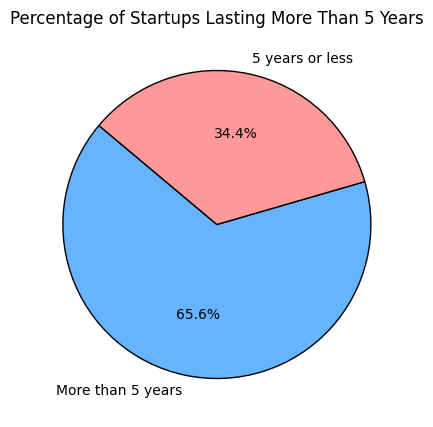

In [22]:
import matplotlib.pyplot as plt

# 5. Percentage of startups lasting more than 5 years
percentage_over_5_years = (data['Years of Operation'] > 5).mean() * 100
percentage_below_5_years = 100 - percentage_over_5_years

labels = ["More than 5 years", "5 years or less"]
sizes = [percentage_over_5_years, percentage_below_5_years]
colors = ["#66b3ff", "#ff9999"]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Percentage of Startups Lasting More Than 5 Years")
plt.show()